# SIMPLE LINEAR REGRESSION

# PROBLEM STATEMENT

You own an ice cream business and you would like to create a model that could predict the daily revenue in dollars based on the outside air temperature (degC). You decide that a Linear Regression model might be a good candidate to solve this problem.  
Data set:
- Independant variable X: Outside Air Temperature
- Dependant variable Y: Overall daily revenue generated in dollars 

# STEP #1: LIBRARIES IMPORT


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# STEP #2: IMPORT DATASET

In [2]:
IceCream = pd.read_csv("IceCreamData.csv")

In [3]:
IceCream.head(100)

,Temperature,Revenue
0,24.566884,534.799028
1,26.005191,625.190122
2,27.790554,660.632289
3,20.595335,487.706960
4,11.503498,316.240194
...,...,...
95,9.018860,212.591740
96,20.265012,474.749392
97,19.363153,460.402500
98,14.685944,343.362905


In [4]:
IceCream.tail()

,Temperature,Revenue
495,22.274899,524.746364
496,32.893092,755.818399
497,12.588157,306.090719
498,22.362402,566.217304
499,28.957736,655.660388


In [5]:
IceCream.describe()

,Temperature,Revenue
count,500.000000,500.000000
mean,22.232225,521.570777
std,8.096388,175.404751
min,0.000000,10.000000
25%,17.122258,405.558681
50%,22.392791,529.368565
75%,27.740674,642.257922
max,45.000000,1000.000000


In [6]:
IceCream.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Temperature  500 non-null    float64
 1   Revenue      500 non-null    float64
dtypes: float64(2)
memory usage: 7.9 KB


# STEP#3: VISUALIZE DATASET

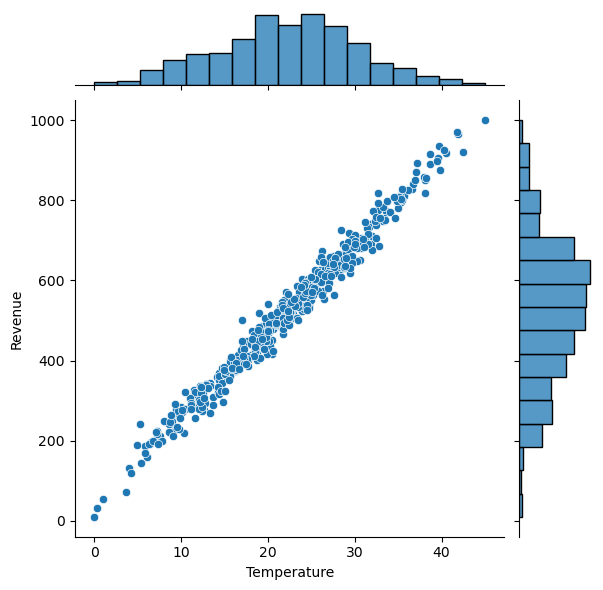

In [7]:
sns.jointplot(x='Temperature', y='Revenue', data = IceCream)

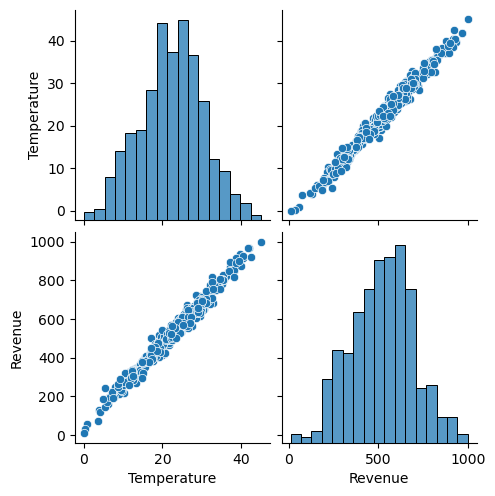

In [8]:
sns.pairplot(IceCream)

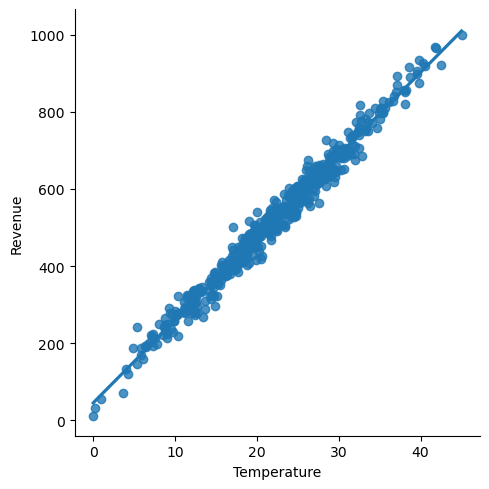

In [9]:
sns.lmplot(x='Temperature', y='Revenue', data=IceCream)

# STEP#4: CREATE TESTING AND TRAINING DATASET

In [10]:
y = IceCream['Revenue']

In [11]:
X = IceCream[['Temperature']]

In [12]:
X

,Temperature
0,24.566884
1,26.005191
2,27.790554
3,20.595335
4,11.503498
...,...
495,22.274899
496,32.893092
497,12.588157
498,22.362402


In [13]:
from sklearn.model_selection import train_test_split

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

# STEP#5: TRAIN THE MODEL

In [15]:
X_train.shape

(375, 1)

In [16]:
from sklearn.linear_model import LinearRegression

In [17]:
regressor = LinearRegression(fit_intercept = True)

In [18]:
regressor.fit(X_train,y_train)

LinearRegression()

In [19]:
print('Linear Model Coefficient (m): ', regressor.coef_)
print('Linear Model Coefficient (b): ', regressor.intercept_)

Linear Model Coefficient (m):  [21.41637967]
Linear Model Coefficient (b):  45.270222752209804


# STEP#6: TEST THE MODEL 

In [20]:
y_predict = regressor.predict( X_test)
y_predict

array([ 797.41671973,  352.64910927,  321.55578106,  708.43027205,
        435.75995283,  450.22159472,  837.6138192 ,  665.44009825,
        457.91643076,  282.11603245,  604.71184053,  709.82761116,
        661.9154391 ,  175.77943898,  337.05787864,  872.56060688,
        317.35928151,  564.46992729,  392.02919784,  650.74906959,
        620.80514884,  747.83525438,  428.00660724,  585.55780368,
        723.51550023,  368.72013255,  476.37231869,  723.4945201 ,
        581.88504598,  467.77422049,  264.68226715,  939.75935298,
        730.68364325,  629.53184361,  190.37061351,  232.78249013,
        314.50653471,  651.32570711,  364.309439  ,  159.59969541,
        359.78998602,  588.69177624,  638.61229008,  492.88486762,
        576.45162415,  670.8365659 ,  575.93973327,  546.09535628,
        543.13074295,  639.09073179,  468.34455582,  681.42628439,
        352.83993499,  394.41192449,  303.60477293,  497.77959897,
        182.20301269,  456.52831976,  636.34230739,  740.55236

In [21]:
y_test

29     809.672053
5      367.940744
190    339.109583
407    702.623614
33     418.137279
          ...    
404    658.600456
385    278.418265
230    278.062759
16     648.209998
123    702.901717
Name: Revenue, Length: 125, dtype: float64

Text(0.5, 1.0, 'Revenue Generated vs. Temperature @Ice Cream Stand(Training dataset)')

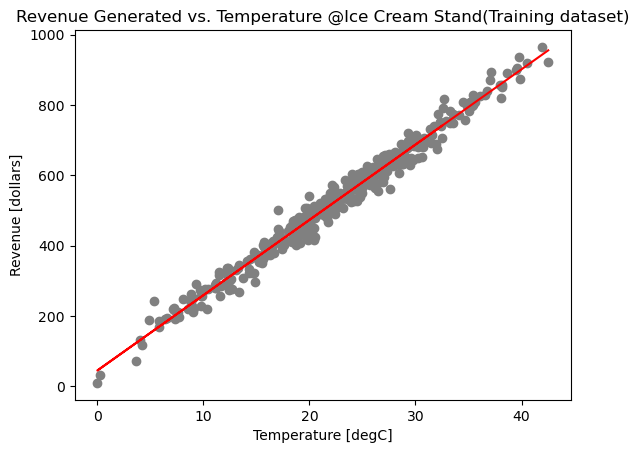

In [22]:
plt.scatter(X_train, y_train, color = 'gray')
plt.plot(X_train, regressor.predict(X_train), color = 'red')
plt.ylabel('Revenue [dollars]')
plt.xlabel('Temperature [degC]')
plt.title('Revenue Generated vs. Temperature @Ice Cream Stand(Training dataset)')

Text(0.5, 1.0, 'Revenue Generated vs. Hours @Ice Cream Stand(Test dataset)')

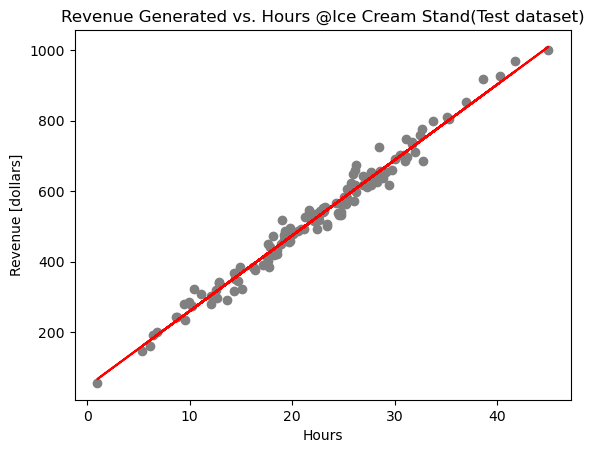

In [23]:
# VISUALIZE TEST SET RESULTS
plt.scatter(X_test, y_test, color = 'gray')
plt.plot(X_test, regressor.predict(X_test), color = 'red')
plt.ylabel('Revenue [dollars]')
plt.xlabel('Hours')
plt.title('Revenue Generated vs. Hours @Ice Cream Stand(Test dataset)')

In [24]:
y_predict = regressor.predict(np.array([30]).reshape(-1, 1)) # or regressor.predict([[30]]) to change it to 2D matrix
y_predict

/Users/loandoan/Opt/anaconda3/lib/python3.11/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([687.76161294])

# GREAT JOB!